# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

# Import Dataset

In [2]:
train=pd.read_csv('input/train.csv')
# test=pd.read_csv('input/test.csv')

In [3]:
# test.head()

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train.shape

(381109, 12)

# Check for missing values

In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* No missing data

<font size="+3" color='#540b11'><b> Exploratory Data Analysis </b></font>

In [7]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [8]:
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


# Target Variable (Response)

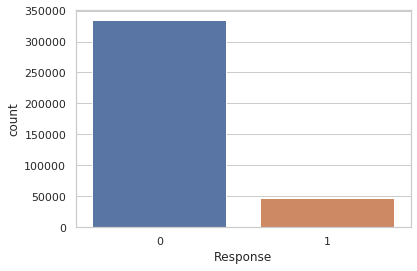

In [9]:
sns.countplot(train.Response)

In [10]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# Age Distribution of Customers

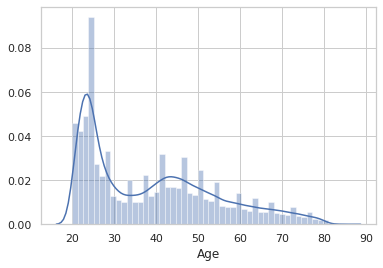

In [11]:
sns.distplot(train.Age)

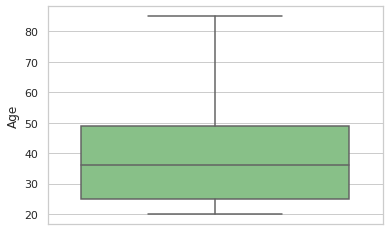

In [12]:
sns.boxplot(y = 'Age', data = train,palette='Accent')

# Age Vs Annual premium 

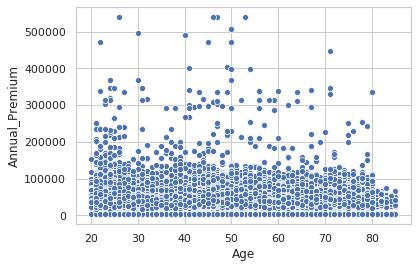

In [13]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

# Gender and Response

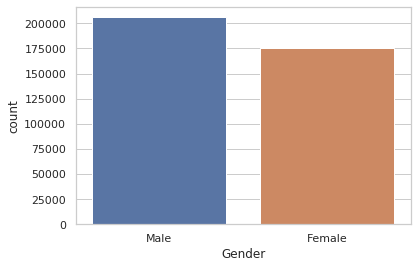

In [14]:
sns.countplot(train.Gender)

In [15]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()


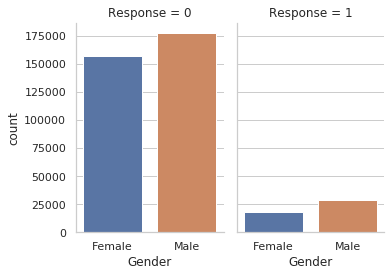

In [16]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Driving license by Gender

In [17]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [18]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


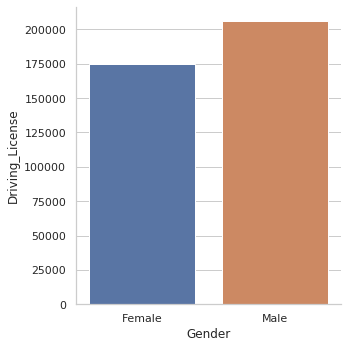

In [19]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

# Customers having Vehicle insurance already

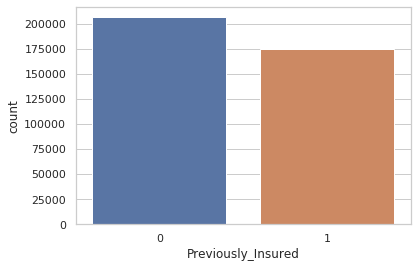

In [20]:
sns.countplot(train.Previously_Insured)

# Vehicle Age 

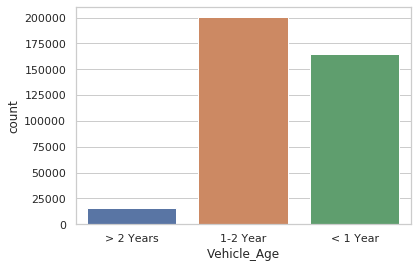

In [21]:
sns.countplot(train.Vehicle_Age)

# Response and Vehicle age

In [22]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


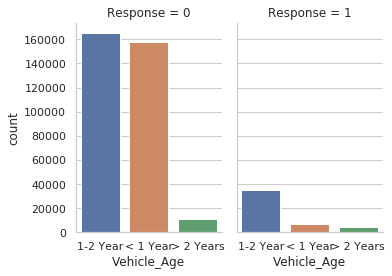

In [23]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Customers having damaged vehicle

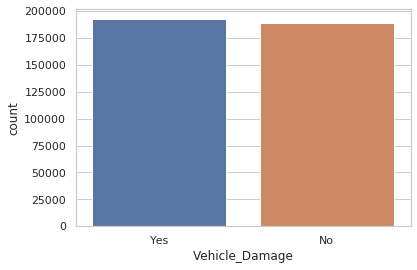

In [24]:
sns.countplot(train.Vehicle_Damage)

# Damage Vehicle and Response

In [25]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

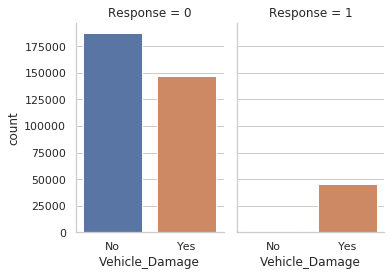

In [26]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Annual Premium Distribution 

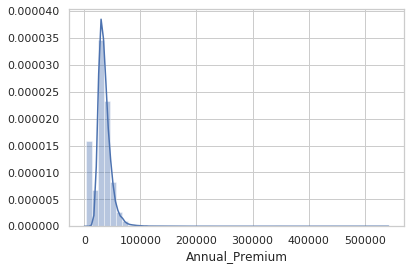

In [27]:
sns.distplot(train.Annual_Premium)

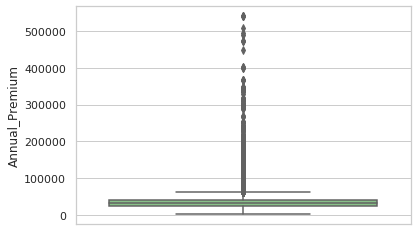

In [28]:
sns.boxplot(y = 'Annual_Premium', data = train,palette='Accent')

# Vintage

Number of Days, Customer has been associated with the company

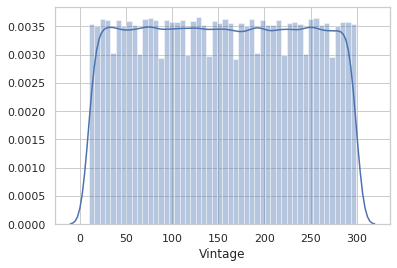

In [29]:
sns.distplot(train.Vintage)

<font size="+3" color='#540b11'><b> Data Preprocessing </b> </font>

In [30]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [31]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [32]:
train=pd.get_dummies(train,drop_first=True)

In [33]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [35]:
train=train.drop('id',axis=1)

In [36]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [37]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,0,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,0,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,0,1,1


In [38]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)

x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [39]:
# id=test.id

In [40]:
# test=test.drop('id',axis=1)

In [41]:
x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

<font size="+3" color='#540b11'><b> Data Modelling and Evaluation </b> </font>

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

# Random Forest Classifier

In [43]:
# %pylab inline

In [44]:
x_train.dtypes

Gender                     object
Age                       float64
Driving_License            object
Region_Code                object
Previously_Insured         object
Annual_Premium            float64
Policy_Sales_Channel       object
Vintage                   float64
Vehicle_Age_lt_1_Year      object
Vehicle_Age_gt_2_Years     object
Vehicle_Damage_Yes         object
dtype: object

In [45]:
model = RandomForestClassifier().fit(x_train,y_train)

# Evaluate Model 

In [46]:
y_pred=model.predict(x_test)

## Classification Report 

In [47]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83603
           1       0.36      0.12      0.18     11675

    accuracy                           0.87     95278
   macro avg       0.62      0.55      0.55     95278
weighted avg       0.82      0.87      0.84     95278



## ROC Curve & AUC of Random forest classifier

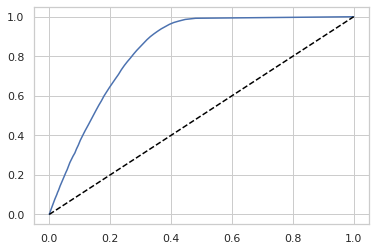

Area under curve (AUC):  0.8343592251960877


In [48]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

# title('Random Forest ROC curve: CC Fraud')
# xlabel('FPR (Precision)')
# ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [51]:
roc_auc_score(y_test, y_score)

0.8343592251960877